<a href="https://colab.research.google.com/github/garbesc/Projet-6/blob/main/Classez_des_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import des librairies
import numpy as np
import pandas as pd
import os, sys, time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.transform import resize

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
images_dir = "/content/drive/MyDrive/OpenClassRooms/Projet n°6/Images/"
img_width, img_height = 224, 224 
channels = 3
batch_size = 64
num_images= 50
image_arr_size= img_width * img_height * channels

In [4]:
len(os.listdir(images_dir))

120

In [5]:
def get_images(images_dir, num_images):

    image_index = 0
    image_arr_size= img_width * img_height * channels
    images = np.ndarray(shape=(num_images, image_arr_size))
    labels = np.array([])                       

    for type in os.listdir(images_dir)[:num_images]:
        type_images = os.listdir(images_dir + type)
        labels= np.append(labels, type.split('-')[1])
        
        for image in type_images[:1]:
            image_file = os.path.join(images_dir, type + '/', image)
            image_data = mpimg.imread(image_file)
            image_resized = resize(image_data, (img_width, img_height), anti_aliasing=True)
            images[image_index, :] = image_resized.flatten()
            print (type, ':', image)
            image_index += 1

    return (images, labels)

In [6]:
def plot_images(instances, images_per_row=10, **options):
    size = img_width
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(img_width, img_height, channels) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((img_width, img_height * n_empty)))
    for row in range(n_rows):
        if (row == len(instances)/images_per_row):
            break
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.figure(figsize=(20,20))
    plt.imshow(image, **options)
    plt.axis("off")
    plt.savefig('dogs_images.png', transparent= True, bbox_inches= 'tight', dpi= 900)
    plt.show()

In [7]:
images, labels = get_images(images_dir, num_images)

n02097474-Tibetan_terrier : n02097474_4404.jpg
n02090622-borzoi : n02090622_2337.jpg
n02091244-Ibizan_hound : n02091244_1037.jpg
n02091831-Saluki : n02091831_10215.jpg
n02095314-wire-haired_fox_terrier : n02095314_1054.jpg
n02102318-cocker_spaniel : n02102318_10058.jpg
n02104365-schipperke : n02104365_10071.jpg
n02097658-silky_terrier : n02097658_1013.jpg
n02113023-Pembroke : n02113023_1144.jpg
n02099849-Chesapeake_Bay_retriever : n02099849_1050.jpg
n02092002-Scottish_deerhound : n02092002_1153.jpg
n02110063-malamute : n02110063_1034.jpg
n02105505-komondor : n02105505_1077.jpg
n02099601-golden_retriever : n02099601_100.jpg
n02095889-Sealyham_terrier : n02095889_10.jpg
n02085782-Japanese_spaniel : n02085782_1085.jpg
n02109961-Eskimo_dog : n02109961_1017.jpg
n02089973-English_foxhound : n02089973_2.jpg
n02113799-standard_poodle : n02113799_1183.jpg
n02097047-miniature_schnauzer : n02097047_1028.jpg
n02093256-Staffordshire_bullterrier : n02093256_11569.jpg
n02097130-giant_schnauzer : n020

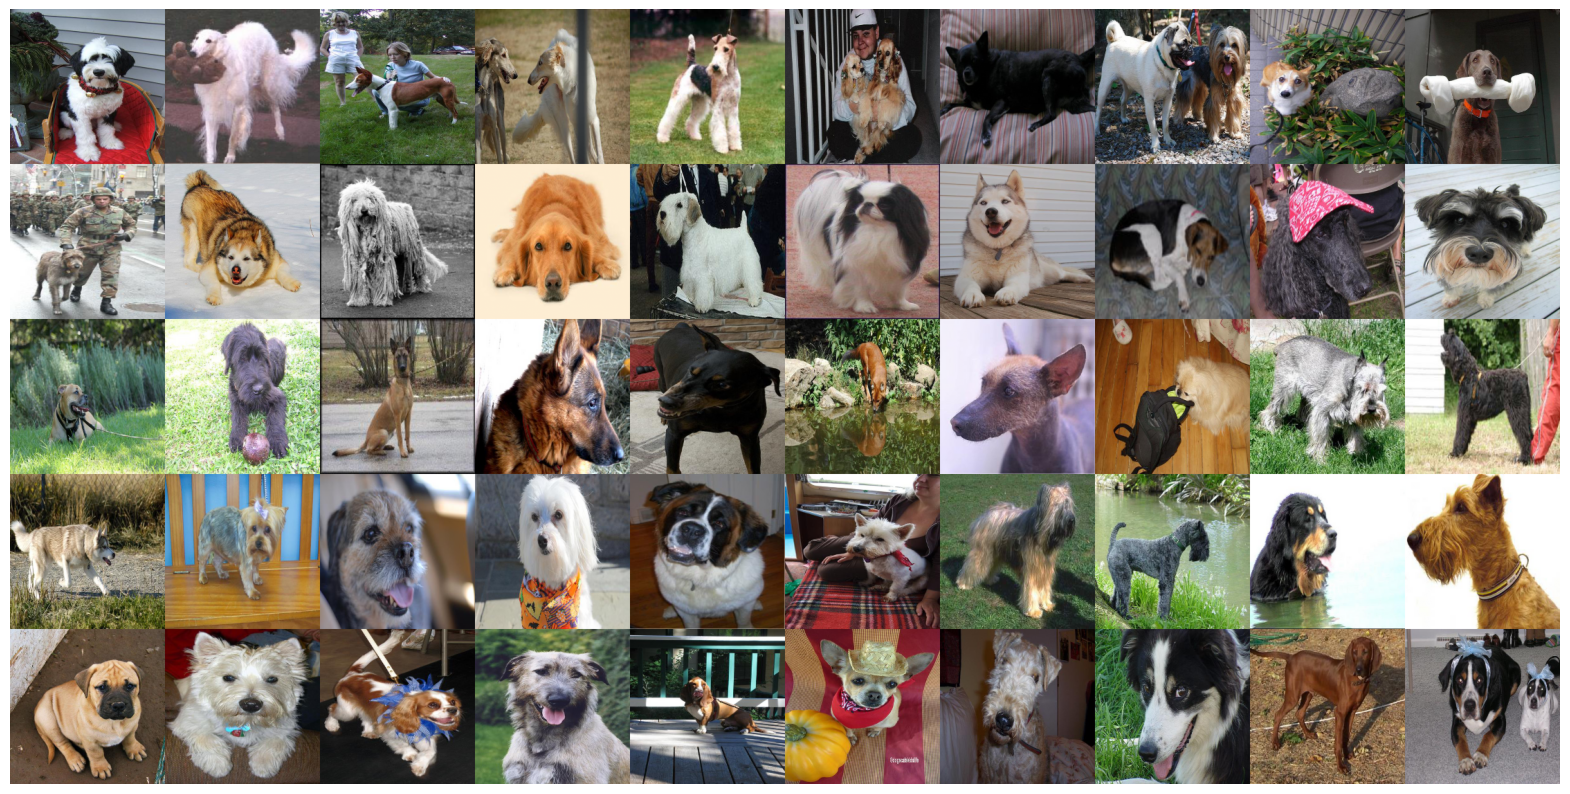

In [8]:
plot_images(images)

Preprocessing